In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-05-06 14:49:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-05-06 14:49:42 (101 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [3]:
cd /tmp

/tmp


In [0]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<UNK>"
training_size = 20000

In [0]:
with open("sarcasm.json",'r') as f:
  datastore = json.load(f)

sentences=[]
labels=[]
urls=[]

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [0]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words= vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding=padding_type, truncating= trunc_type)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding=padding_type, truncating= trunc_type)

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length= max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             
])


In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [49]:
import numpy as np
num_epochs= 30
history = model.fit(np.array(training_padded), 
          np.array(training_labels), 
          epochs= num_epochs,
          validation_data = (np.array(testing_padded), np.array(testing_labels)),
          verbose = 2
)

Epoch 1/30
625/625 - 2s - loss: 0.5664 - accuracy: 0.7059 - val_loss: 0.3989 - val_accuracy: 0.8383
Epoch 2/30
625/625 - 2s - loss: 0.3132 - accuracy: 0.8715 - val_loss: 0.3450 - val_accuracy: 0.8496
Epoch 3/30
625/625 - 2s - loss: 0.2342 - accuracy: 0.9083 - val_loss: 0.3442 - val_accuracy: 0.8504
Epoch 4/30
625/625 - 2s - loss: 0.1894 - accuracy: 0.9269 - val_loss: 0.3624 - val_accuracy: 0.8544
Epoch 5/30
625/625 - 2s - loss: 0.1563 - accuracy: 0.9419 - val_loss: 0.3926 - val_accuracy: 0.8475
Epoch 6/30
625/625 - 2s - loss: 0.1330 - accuracy: 0.9518 - val_loss: 0.4394 - val_accuracy: 0.8405
Epoch 7/30
625/625 - 2s - loss: 0.1126 - accuracy: 0.9614 - val_loss: 0.4691 - val_accuracy: 0.8386
Epoch 8/30
625/625 - 2s - loss: 0.0972 - accuracy: 0.9675 - val_loss: 0.5199 - val_accuracy: 0.8340
Epoch 9/30
625/625 - 2s - loss: 0.0840 - accuracy: 0.9715 - val_loss: 0.5508 - val_accuracy: 0.8386
Epoch 10/30
625/625 - 2s - loss: 0.0740 - accuracy: 0.9766 - val_loss: 0.5990 - val_accuracy: 0.8360

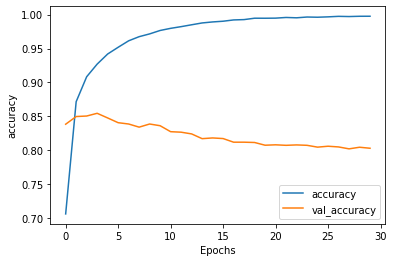

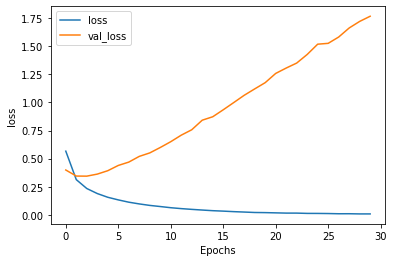

In [50]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
